In [1]:
#imports 
import numpy as np
import pandas as pd
from math import sqrt 
from pprint import pprint
from numpy import array
from time import time

In [2]:
# load data
from keras.datasets import imdb
from keras.preprocessing import sequence
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length) 

Using TensorFlow backend.


In [3]:
# DeepExtraTrees  
import argparse
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/imbd.json")    
gc = GCForest(config)

In [4]:
# count of class
len(np.unique(y_train))

2

In [5]:
 # X_enc is the concatenated predict_proba result of DeepExtraTrees

X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
     

[ 2018-07-27 22:03:07,084][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 500)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 500)],y_test.shape=(25000,)
[ 2018-07-27 22:03:07,112][cascade_classifier.fit_transform] group_dims=[500]
[ 2018-07-27 22:03:07,114][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:03:07,114][cascade_classifier.fit_transform] group_ends=[500]
[ 2018-07-27 22:03:07,116][cascade_classifier.fit_transform] X_train.shape=(25000, 500),X_test.shape=(25000, 500)
[ 2018-07-27 22:03:07,185][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 500), X_cur_test.shape=(25000, 500)
[ 2018-07-27 22:03:11,777][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=52.04%
[ 2018-07-27 22:03:16,786][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=52.36%
[ 2018-07-27 22:03:21,597][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

In [6]:
# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of DeepExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-27 22:03:52,929][cascade_classifier.transform] X_groups_test.shape=[(25000, 500)]
[ 2018-07-27 22:03:52,937][cascade_classifier.transform] group_dims=[500]
[ 2018-07-27 22:03:52,938][cascade_classifier.transform] X_test.shape=(25000, 500)
[ 2018-07-27 22:03:52,970][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(25000, 500)


Test Accuracy of DeepExtraTrees = 52.656000 %
[[7193 5307]
 [6529 5971]]


             precision    recall  f1-score   support

          0       0.52      0.58      0.55     12500
          1       0.53      0.48      0.50     12500

avg / total       0.53      0.53      0.53     25000



In [7]:
# Make data + Estimators
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

[ 2018-07-27 22:03:56,703][cascade_classifier.transform] X_groups_test.shape=[(25000, 500)]
[ 2018-07-27 22:03:56,711][cascade_classifier.transform] group_dims=[500]
[ 2018-07-27 22:03:56,712][cascade_classifier.transform] X_test.shape=(25000, 500)
[ 2018-07-27 22:03:56,745][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(25000, 500)


In [8]:
X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

[ 2018-07-27 22:04:00,522][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-27 22:04:00,598][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-27 22:04:00,600][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:04:00,601][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-27 22:04:00,602][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-27 22:04:00,678][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-27 22:04:06,704][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=53.28%
[ 2018-07-27 22:04:13,215][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=52.32%
[ 2018-07-27 22:04:19,647][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

In [9]:
# predict  data + Es
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of DeepExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-27 22:05:06,220][cascade_classifier.transform] X_groups_test.shape=[(25000, 502)]
[ 2018-07-27 22:05:06,261][cascade_classifier.transform] group_dims=[502]
[ 2018-07-27 22:05:06,262][cascade_classifier.transform] X_test.shape=(25000, 502)
[ 2018-07-27 22:05:06,301][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(25000, 502)


Test Accuracy of DeepExtraTrees = 53.100000 %
[[7287 5213]
 [6512 5988]]


             precision    recall  f1-score   support

          0       0.53      0.58      0.55     12500
          1       0.53      0.48      0.51     12500

avg / total       0.53      0.53      0.53     25000



In [10]:
print("X_train_enc.shape={}, X_test_enc.shape={}".format(X_train_enc.shape, X_test_enc.shape))

X_train_enc.shape=(25000, 2), X_test_enc.shape=(25000, 2)


In [11]:
print("X_train_enc.shape={}, X_test_enc.shape={}".format(X_train.shape, X_test.shape))

X_train_enc.shape=(25000, 502), X_test_enc.shape=(25000, 502)


In [12]:
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of DeepExtratTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")


[ 2018-07-27 22:05:10,258][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-27 22:05:10,333][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-27 22:05:10,334][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:05:10,334][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-27 22:05:10,335][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-27 22:05:10,412][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-27 22:05:16,426][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=52.00%
[ 2018-07-27 22:05:22,697][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=52.52%
[ 2018-07-27 22:05:29,057][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 52.728000 %', 'Layer :', 0)
[[7142 5358]
 [6460 6040]]


             precision    recall  f1-score   support

          0       0.53      0.57      0.55     12500
          1       0.53      0.48      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '67.839', ' seconds')


[ 2018-07-27 22:06:21,941][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-27 22:06:21,993][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-27 22:06:21,994][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:06:21,995][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-27 22:06:21,996][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-27 22:06:22,073][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-27 22:06:28,304][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=53.60%
[ 2018-07-27 22:06:34,585][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=50.76%
[ 2018-07-27 22:06:40,954][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 52.624000 %', 'Layer :', 1)
[[7021 5479]
 [6365 6135]]


             precision    recall  f1-score   support

          0       0.52      0.56      0.54     12500
          1       0.53      0.49      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '65.791', ' seconds')


[ 2018-07-27 22:07:31,387][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-27 22:07:31,438][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-27 22:07:31,439][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:07:31,440][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-27 22:07:31,441][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-27 22:07:31,518][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-27 22:07:37,755][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=53.48%
[ 2018-07-27 22:07:44,187][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=51.84%
[ 2018-07-27 22:07:50,549][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 52.780000 %', 'Layer :', 2)
[[7159 5341]
 [6464 6036]]


             precision    recall  f1-score   support

          0       0.53      0.57      0.55     12500
          1       0.53      0.48      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '65.818', ' seconds')


[ 2018-07-27 22:08:41,225][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-27 22:08:41,311][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-27 22:08:41,312][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:08:41,314][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-27 22:08:41,315][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-27 22:08:41,395][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-27 22:08:49,378][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=52.44%
[ 2018-07-27 22:08:56,248][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=54.16%
[ 2018-07-27 22:09:03,555][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 53.080000 %', 'Layer :', 3)
[[7154 5346]
 [6384 6116]]


             precision    recall  f1-score   support

          0       0.53      0.57      0.55     12500
          1       0.53      0.49      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '68.099', ' seconds')


[ 2018-07-27 22:09:53,078][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-27 22:09:53,154][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-27 22:09:53,155][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:09:53,156][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-27 22:09:53,156][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-27 22:09:53,233][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-27 22:10:00,260][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=53.44%
[ 2018-07-27 22:10:06,689][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=53.84%
[ 2018-07-27 22:10:13,048][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 53.072000 %', 'Layer :', 4)
[[7129 5371]
 [6361 6139]]


             precision    recall  f1-score   support

          0       0.53      0.57      0.55     12500
          1       0.53      0.49      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '66.155', ' seconds')


[ 2018-07-27 22:11:02,953][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-27 22:11:03,030][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-27 22:11:03,031][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:11:03,032][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-27 22:11:03,032][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-27 22:11:03,110][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-27 22:11:09,221][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=52.08%
[ 2018-07-27 22:11:15,687][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=51.40%
[ 2018-07-27 22:11:22,158][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 52.796000 %', 'Layer :', 5)
[[7048 5452]
 [6349 6151]]


             precision    recall  f1-score   support

          0       0.53      0.56      0.54     12500
          1       0.53      0.49      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '67.596', ' seconds')


[ 2018-07-27 22:12:14,300][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-27 22:12:14,376][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-27 22:12:14,377][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:12:14,378][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-27 22:12:14,379][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-27 22:12:14,455][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-27 22:12:20,602][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=53.48%
[ 2018-07-27 22:12:27,142][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=51.56%
[ 2018-07-27 22:12:33,795][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 52.944000 %', 'Layer :', 6)
[[7258 5242]
 [6522 5978]]


             precision    recall  f1-score   support

          0       0.53      0.58      0.55     12500
          1       0.53      0.48      0.50     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '67.155', ' seconds')


[ 2018-07-27 22:13:25,121][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-27 22:13:25,199][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-27 22:13:25,200][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:13:25,201][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-27 22:13:25,201][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-27 22:13:25,278][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-27 22:13:31,798][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=53.04%
[ 2018-07-27 22:13:38,356][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=50.40%
[ 2018-07-27 22:13:45,194][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 52.840000 %', 'Layer :', 7)
[[7054 5446]
 [6344 6156]]


             precision    recall  f1-score   support

          0       0.53      0.56      0.54     12500
          1       0.53      0.49      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '67.86', ' seconds')


[ 2018-07-27 22:14:36,690][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-27 22:14:36,768][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-27 22:14:36,769][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:14:36,770][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-27 22:14:36,770][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-27 22:14:36,848][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-27 22:14:43,479][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=51.72%
[ 2018-07-27 22:14:51,684][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=51.88%
[ 2018-07-27 22:14:59,109][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 53.104000 %', 'Layer :', 8)
[[7143 5357]
 [6367 6133]]


             precision    recall  f1-score   support

          0       0.53      0.57      0.55     12500
          1       0.53      0.49      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '69.73', ' seconds')


[ 2018-07-27 22:15:49,997][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-27 22:15:50,072][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-27 22:15:50,073][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:15:50,074][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-27 22:15:50,074][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-27 22:15:50,151][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-27 22:15:57,085][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=52.24%
[ 2018-07-27 22:16:04,525][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=53.16%
[ 2018-07-27 22:16:11,287][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 52.684000 %', 'Layer :', 9)
[[7160 5340]
 [6489 6011]]


             precision    recall  f1-score   support

          0       0.52      0.57      0.55     12500
          1       0.53      0.48      0.50     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '68.153', ' seconds')


[ 2018-07-27 22:17:02,184][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-27 22:17:02,260][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-27 22:17:02,261][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:17:02,262][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-27 22:17:02,263][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-27 22:17:02,340][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-27 22:17:08,660][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=52.72%
[ 2018-07-27 22:17:15,295][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=52.08%
[ 2018-07-27 22:17:21,836][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 52.716000 %', 'Layer :', 10)
[[7142 5358]
 [6463 6037]]


             precision    recall  f1-score   support

          0       0.52      0.57      0.55     12500
          1       0.53      0.48      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '69.496', ' seconds')


[ 2018-07-27 22:18:15,375][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-27 22:18:15,453][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-27 22:18:15,454][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:18:15,454][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-27 22:18:15,455][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-27 22:18:15,533][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-27 22:18:21,848][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=52.80%
[ 2018-07-27 22:18:28,389][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=52.16%
[ 2018-07-27 22:18:34,823][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 52.848000 %', 'Layer :', 11)
[[7120 5380]
 [6408 6092]]


             precision    recall  f1-score   support

          0       0.53      0.57      0.55     12500
          1       0.53      0.49      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '67.442', ' seconds')


[ 2018-07-27 22:19:26,415][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-27 22:19:26,494][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-27 22:19:26,495][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:19:26,495][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-27 22:19:26,496][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-27 22:19:26,574][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-27 22:19:32,886][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=51.96%
[ 2018-07-27 22:19:39,309][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=53.36%
[ 2018-07-27 22:19:45,890][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 53.048000 %', 'Layer :', 12)
[[7076 5424]
 [6314 6186]]


             precision    recall  f1-score   support

          0       0.53      0.57      0.55     12500
          1       0.53      0.49      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '67.108', ' seconds')


[ 2018-07-27 22:20:37,118][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-27 22:20:37,194][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-27 22:20:37,195][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:20:37,195][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-27 22:20:37,196][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-27 22:20:37,273][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-27 22:20:44,081][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=53.72%
[ 2018-07-27 22:20:52,148][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=51.60%
[ 2018-07-27 22:20:59,374][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 52.848000 %', 'Layer :', 13)
[[7075 5425]
 [6363 6137]]


             precision    recall  f1-score   support

          0       0.53      0.57      0.55     12500
          1       0.53      0.49      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '69.596', ' seconds')


[ 2018-07-27 22:21:50,366][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-27 22:21:50,443][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-27 22:21:50,444][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:21:50,445][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-27 22:21:50,445][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-27 22:21:50,522][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-27 22:21:57,436][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=53.04%
[ 2018-07-27 22:22:04,995][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=51.84%
[ 2018-07-27 22:22:11,632][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 52.980000 %', 'Layer :', 14)
[[7218 5282]
 [6473 6027]]


             precision    recall  f1-score   support

          0       0.53      0.58      0.55     12500
          1       0.53      0.48      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '68.672', ' seconds')


[ 2018-07-27 22:23:03,227][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-27 22:23:03,305][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-27 22:23:03,306][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:23:03,307][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-27 22:23:03,308][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-27 22:23:03,386][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-27 22:23:09,818][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=52.88%
[ 2018-07-27 22:23:16,258][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=50.96%
[ 2018-07-27 22:23:22,828][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 52.996000 %', 'Layer :', 15)
[[7246 5254]
 [6497 6003]]


             precision    recall  f1-score   support

          0       0.53      0.58      0.55     12500
          1       0.53      0.48      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '69.876', ' seconds')


[ 2018-07-27 22:24:16,740][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-27 22:24:16,818][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-27 22:24:16,819][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:24:16,820][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-27 22:24:16,821][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-27 22:24:16,899][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-27 22:24:23,239][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=52.88%
[ 2018-07-27 22:24:29,788][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=51.88%
[ 2018-07-27 22:24:36,429][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 53.112000 %', 'Layer :', 16)
[[7166 5334]
 [6388 6112]]


             precision    recall  f1-score   support

          0       0.53      0.57      0.55     12500
          1       0.53      0.49      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '71.071', ' seconds')


[ 2018-07-27 22:25:31,469][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-27 22:25:31,545][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-27 22:25:31,546][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:25:31,547][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-27 22:25:31,548][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-27 22:25:31,624][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-27 22:25:39,282][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=55.28%
[ 2018-07-27 22:25:46,827][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=52.72%
[ 2018-07-27 22:25:53,451][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 52.640000 %', 'Layer :', 17)
[[7127 5373]
 [6467 6033]]


             precision    recall  f1-score   support

          0       0.52      0.57      0.55     12500
          1       0.53      0.48      0.50     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '73.296', ' seconds')


[ 2018-07-27 22:26:51,161][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-27 22:26:51,243][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-27 22:26:51,245][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:26:51,249][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-27 22:26:51,253][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-27 22:26:51,338][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-27 22:26:58,018][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=52.20%
[ 2018-07-27 22:27:04,660][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=52.32%
[ 2018-07-27 22:27:12,048][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 53.172000 %', 'Layer :', 18)
[[7154 5346]
 [6361 6139]]


             precision    recall  f1-score   support

          0       0.53      0.57      0.55     12500
          1       0.53      0.49      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '73.381', ' seconds')


[ 2018-07-27 22:28:08,250][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-27 22:28:08,326][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-27 22:28:08,327][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 22:28:08,328][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-27 22:28:08,329][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-27 22:28:08,405][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-27 22:28:14,604][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=53.60%
[ 2018-07-27 22:28:21,047][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=50.88%
[ 2018-07-27 22:28:27,730][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

('Test Accuracy of DeepExtratTrees = 52.944000 %', 'Layer :', 19)
[[6942 5558]
 [6206 6294]]


             precision    recall  f1-score   support

          0       0.53      0.56      0.54     12500
          1       0.53      0.50      0.52     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '67.257', ' seconds')


('Opt_layer_num =', 18, ' Accuracy =', 53.17, 'Time =', 1304.1500000000001)


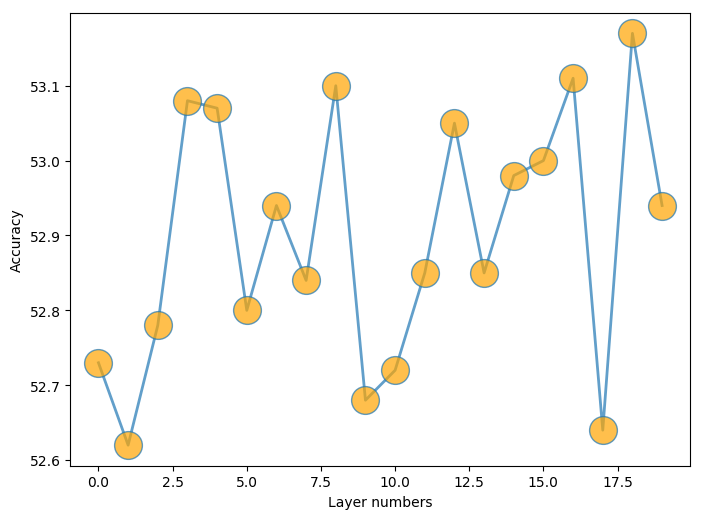

In [13]:
print ("Opt_layer_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Layer numbers')
plt.show()

In [14]:
Accuracy

[52.73,
 52.62,
 52.78,
 53.08,
 53.07,
 52.8,
 52.94,
 52.84,
 53.1,
 52.68,
 52.72,
 52.85,
 53.05,
 52.85,
 52.98,
 53.0,
 53.11,
 52.64,
 53.17,
 52.94]